In [1]:
#import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from datetime import timedelta  
import pandas as pd
import json
import numpy as np
import requests
import time
import requests 
from pandas.plotting import register_matplotlib_converters
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from meteostat import Point, Daily
import pyet as pyet
import csv
import codecs
import urllib.request
import urllib.error
import sys
from config import API_KEY

In [2]:
from datetime import datetime
from meteostat import Hourly

now = datetime.utcnow().replace(microsecond=0, second=0, minute=0)
start = now - timedelta(days=600)
now_string = now.strftime("%Y-%m-%d")
start_string = start.strftime("%Y-%m-%d")


# Get hourly data
data = Hourly('72658', start, now)
data = data.fetch()
data = data.reset_index()
data['Date'] = data['time'].dt.date


data_mean = data.groupby('Date').mean()
data_mean['wspd_m_s'] = data_mean['wspd'] * 1000 / 60 / 60
data_mean['pres_kpa'] = data_mean['pres'] * 0.1
data_min = data.groupby('Date').min()
data_max = data.groupby('Date').max()
data_mean


#data_groupby = data_groupby.reset_index()


,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,wspd_m_s,pres_kpa
Date,,,,,,,,,,,,,
2021-10-19,21.066667,7.133333,40.777778,0.000000,NaN,166.111111,10.922222,NaN,1012.600000,NaN,1.888889,3.033951,101.260000
2021-10-20,13.683333,9.058333,75.125000,0.663636,NaN,90.875000,13.645833,NaN,1012.904167,NaN,4.666667,3.790509,101.290417
2021-10-21,8.616667,4.029167,75.500000,0.227778,NaN,208.750000,20.091667,NaN,1015.275000,NaN,4.375000,5.581019,101.527500
2021-10-22,5.025000,-1.233333,66.083333,0.000000,NaN,263.500000,6.616667,NaN,1019.608333,NaN,2.916667,1.837963,101.960833
2021-10-23,5.354167,-1.187500,64.791667,0.000000,NaN,74.666667,7.675000,NaN,1018.570833,NaN,2.000000,2.131944,101.857083
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-07,23.445833,12.379167,51.000000,0.000000,NaN,90.500000,15.087500,NaN,1012.787500,NaN,3.958333,4.190972,101.278750
2023-06-08,22.654167,5.150000,33.041667,0.000000,NaN,110.625000,13.350000,NaN,1012.750000,NaN,2.416667,3.708333,101.275000
2023-06-09,23.220833,8.116667,40.000000,0.000000,NaN,169.833333,11.004167,NaN,1012.229167,NaN,1.916667,3.056713,101.222917


In [3]:
meteo = pd.DataFrame({"tmean":data_mean["temp"],
                      "tmax":data_max["temp"],
                      "tmin":data_min["temp"],
                      "rhmax":data_max["rhum"],
                      "rhmin":data_min["rhum"],
                      "u2":data_mean["wspd_m_s"],
                      "pressure":data_mean['pres_kpa']})
meteo = meteo.reset_index()
meteo['datetime'] = pd.to_datetime(meteo['Date'], utc=True)

In [4]:
BaseURL = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/'


LOCATION='Minneapolis'
UNIT_GROUP="metric"

StartDate = start_string
EndDate= now_string
#JSON or CSV 
#JSON format supports daily, hourly, current conditions, weather alerts and events in a single JSON package
#CSV format requires an 'include' parameter below to indicate which table section is required
ContentType="json"

#include sections
#values include days,hours,current,alerts
Include="days"

#basic query including location
ApiQuery=BaseURL + LOCATION

#append the start and end date if present
if (len(StartDate)):
    ApiQuery+="/"+StartDate
    if (len(EndDate)):
        ApiQuery+="/"+EndDate

#Url is completed. Now add query parameters (could be passed as GET or POST)
ApiQuery+="?"

#append each parameter as necessary
if (len(UNIT_GROUP)):
    ApiQuery+="&unitGroup="+UNIT_GROUP

if (len(ContentType)):
    ApiQuery+="&contentType="+ContentType

if (len(Include)):
    ApiQuery+="&include="+Include

ApiQuery+="&key="+API_KEY

def getWeatherForecast():

    try:
            req = urllib.request.urlopen(ApiQuery)
    except:
            print("Could not read from:"+ApiQuery);
            return []
                
    rawForecastData = req.read()
    req.close()
    return json.loads(rawForecastData)
    
weatherForecast = getWeatherForecast()

days=weatherForecast['days'];

solarrad = pd.DataFrame(days)
solarrad['datetime'] = pd.to_datetime(solarrad['datetime'], utc=True)

solarrad = solarrad[['datetime', 'solarradiation']]
solarrad

,datetime,solarradiation
0,2021-10-19 00:00:00+00:00,140.0
1,2021-10-20 00:00:00+00:00,39.1
2,2021-10-21 00:00:00+00:00,120.2
3,2021-10-22 00:00:00+00:00,120.0
4,2021-10-23 00:00:00+00:00,143.7
...,...,...
596,2023-06-07 00:00:00+00:00,386.1
597,2023-06-08 00:00:00+00:00,498.3
598,2023-06-09 00:00:00+00:00,519.3
599,2023-06-10 00:00:00+00:00,364.9


In [5]:
merged = pd.merge(meteo, solarrad, on="datetime")
merged['Date'] = pd.to_datetime(merged['Date'], utc=True)
merged

,Date,tmean,tmax,tmin,rhmax,rhmin,u2,pressure,datetime,solarradiation
0,2021-10-19 00:00:00+00:00,21.066667,23.0,17.0,50.0,36.0,3.033951,101.260000,2021-10-19 00:00:00+00:00,140.0
1,2021-10-20 00:00:00+00:00,13.683333,21.1,11.0,93.0,42.0,3.790509,101.290417,2021-10-20 00:00:00+00:00,39.1
2,2021-10-21 00:00:00+00:00,8.616667,12.2,6.1,93.0,41.0,5.581019,101.527500,2021-10-21 00:00:00+00:00,120.2
3,2021-10-22 00:00:00+00:00,5.025000,10.0,1.0,82.0,37.0,1.837963,101.960833,2021-10-22 00:00:00+00:00,120.0
4,2021-10-23 00:00:00+00:00,5.354167,11.0,0.0,85.0,44.0,2.131944,101.857083,2021-10-23 00:00:00+00:00,143.7
...,...,...,...,...,...,...,...,...,...,...
596,2023-06-07 00:00:00+00:00,23.445833,27.8,19.4,66.0,33.0,4.190972,101.278750,2023-06-07 00:00:00+00:00,386.1
597,2023-06-08 00:00:00+00:00,22.654167,28.0,17.0,46.0,21.0,3.708333,101.275000,2023-06-08 00:00:00+00:00,498.3
598,2023-06-09 00:00:00+00:00,23.220833,29.4,16.7,62.0,24.0,3.056713,101.222917,2023-06-09 00:00:00+00:00,519.3
599,2023-06-10 00:00:00+00:00,23.891667,28.3,20.3,78.0,28.0,2.495370,100.817500,2023-06-10 00:00:00+00:00,364.9


In [6]:
merged.rename(columns = {'solarradiation':'rs', 'Date':'date'}, inplace = True)
del merged['datetime']
merged = merged.set_index('date')


In [7]:
merged['rs'] = merged['rs']*86400/1000000
merged

,tmean,tmax,tmin,rhmax,rhmin,u2,pressure,rs
date,,,,,,,,
2021-10-19 00:00:00+00:00,21.066667,23.0,17.0,50.0,36.0,3.033951,101.260000,12.09600
2021-10-20 00:00:00+00:00,13.683333,21.1,11.0,93.0,42.0,3.790509,101.290417,3.37824
2021-10-21 00:00:00+00:00,8.616667,12.2,6.1,93.0,41.0,5.581019,101.527500,10.38528
2021-10-22 00:00:00+00:00,5.025000,10.0,1.0,82.0,37.0,1.837963,101.960833,10.36800
2021-10-23 00:00:00+00:00,5.354167,11.0,0.0,85.0,44.0,2.131944,101.857083,12.41568
...,...,...,...,...,...,...,...,...
2023-06-07 00:00:00+00:00,23.445833,27.8,19.4,66.0,33.0,4.190972,101.278750,33.35904
2023-06-08 00:00:00+00:00,22.654167,28.0,17.0,46.0,21.0,3.708333,101.275000,43.05312
2023-06-09 00:00:00+00:00,23.220833,29.4,16.7,62.0,24.0,3.056713,101.222917,44.86752


In [8]:
tmean, tmax, tmin, rhmax, rhmin, wind, pressure, rs = [merged[col] for col in merged.columns]
lat = 40.49*np.pi/180

In [9]:
pe_penman = pyet.penman(tmean, wind, rs=rs, pressure=pressure, elevation=256.0, lat=lat, tmax=tmax, tmin=tmin, rhmax=rhmax, rhmin=rhmin)
pe_pt = pyet.priestley_taylor(tmean, wind, rs=rs, pressure=pressure, elevation=256.0, lat=lat, tmax=tmax, tmin=tmin, rhmax=rhmax, rhmin=rhmin)
pe_fao56 = pyet.pm_fao56(tmean, wind, rs=rs, pressure=pressure, elevation=256.0, lat=lat, tmax=tmax, tmin=tmin, rhmax=rhmax, rhmin=rhmin)
#pe_oudin = pyet.oudin(tmean, wind, rs=rs, pressure=pressure, elevation=256.0, lat=lat, tmax=tmax, tmin=tmin, rhmax=rhmax, rhmin=rhmin)

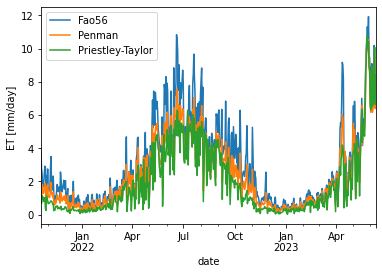

In [10]:
pe_fao56.plot(label="Fao56")
pe_penman.plot(label="Penman");
pe_pt.plot(label="Priestley-Taylor");
plt.ylabel("ET [mm/day] ");
plt.legend();

In [76]:
export_df = pd.DataFrame(data=pe_fao56)

In [77]:
export_df

,0
date,
2021-03-03 00:00:00+00:00,1.808123
2021-03-04 00:00:00+00:00,2.054949
2021-03-05 00:00:00+00:00,1.808274
2021-03-06 00:00:00+00:00,1.888323
2021-03-07 00:00:00+00:00,3.442518
...,...
2022-10-20 00:00:00+00:00,2.599716
2022-10-21 00:00:00+00:00,3.469465
2022-10-22 00:00:00+00:00,3.890619


In [78]:
export_df.to_csv('evap_fao56.csv')